# Outline:
Using Usedcars dataset from Kaggle to understand the correlation between the best sold combinations of used cars. The dataset contains details of more than 370,000 used cars and their price.

1.Understanding data

* Getting sense of overall data 
* Importance of features 
       ** inspect each feature
       ** missing values- remove feature/impute missing values
* target

2.Data Exploration and Visualization

* Descriptive statistics
* Univariate Distribution
* Bivariate Distribution
* Acessing patterns

3.Data Preprocessing

* Continuous data
      ** Feature Scaling
      ** Normalization 
      ** Outlier Detection
* Categorical data
      ** Feature transformation
      ** Dimensionality reduction
      ** Feature Selection Algorithms

4.Model Development

* Shuffle Split
* Model Selection
* Choose Performance metrics
* train-test-split

5.Analyzing Performance

* Learning curves
      ** Bias Variance trade-off

6.Fitting model

* Model(Time/resource/requirement)
* Metrics
* Grid search/ Random search
* Cross Validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
train= pd.read_csv('/Users/meenajoshi/Desktop/autos.csv', encoding='cp1252')
train.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


Lets check the unique entries in columns:

In [3]:
cat_col= train[['name','seller','offerType','abtest','vehicleType','gearbox','model','fuelType'
          ,'brand','nrOfPictures','notRepairedDamage' ]]
for i, c in enumerate(cat_col):
    u= train[c].unique()
    print('\n {},{},{}'.format(i,c,u))


 0,name,['Golf_3_1.6' 'A5_Sportback_2.7_Tdi' 'Jeep_Grand_Cherokee_"Overland"' ...
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']

 1,seller,['privat' 'gewerblich']

 2,offerType,['Angebot' 'Gesuch']

 3,abtest,['test' 'control']

 4,vehicleType,[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']

 5,gearbox,['manuell' 'automatik' nan]

 6,model,['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'andere' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'glk' '100'
 'z_reihe' 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'tour

# Data Cleaning
  # Name
   There are 233531 unique names of the used cars, lets drop this column.
  # seller
   Except 3, all sellers are privat, so we can drop these 3 rows and finally drop the
   seller column. 
  # offerType
   Except 12 Gesuch all offerType are Angebot, here again we can drop these 12 entries 
   and finally drop the column'offerType.
  # nrOfPictures
   All values in this column are zero, which is worthless. So this column will be 
   dropped as well.


In [4]:
train= train.drop(['name','seller','offerType','nrOfPictures'], axis=1)

Lets check the features with null values.

In [5]:
train.isnull().sum()

dateCrawled                0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

Visualization of few features without null values to get better idea.

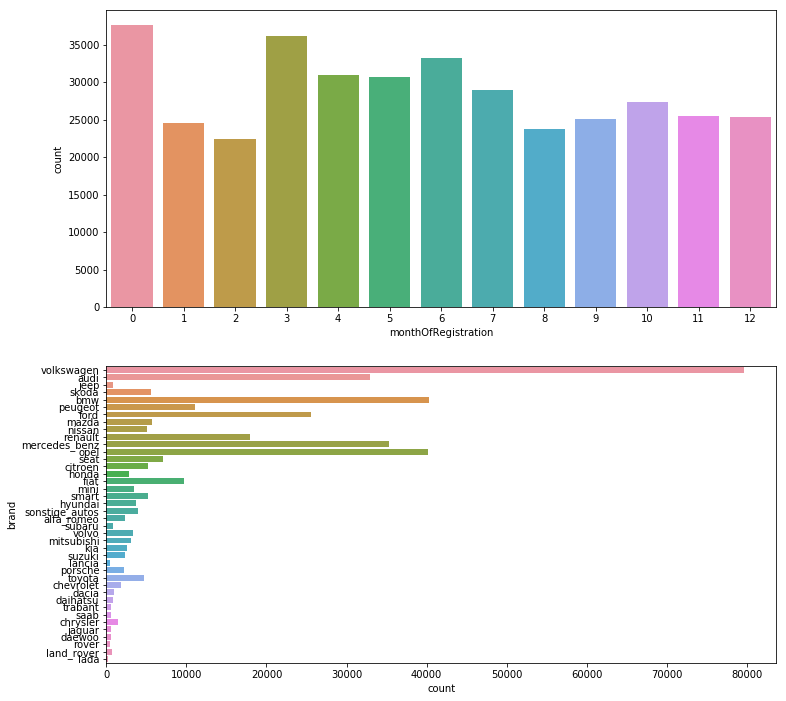

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.countplot(train.monthOfRegistration)
plt.subplot(2,1,2)
sns.countplot(y=train.brand)
plt.show()

# Features with null values

vehicleType           
gearbox                
model                  
fuelType              
notRepairedDamage  

Lets fill the null values with NA(not available) first.

In [7]:
train.vehicleType.fillna('NA',inplace=True)
train.gearbox.fillna('NA',inplace=True)
train.model.fillna('NA',inplace=True)
train.fuelType.fillna('NA',inplace=True)
train.notRepairedDamage.fillna('NA',inplace=True)

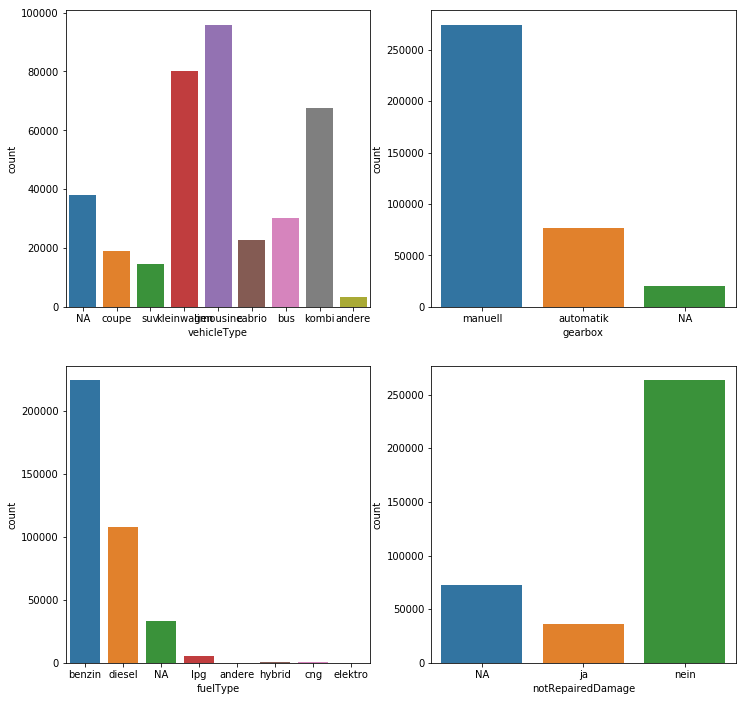

In [8]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(train.vehicleType)
plt.subplot(2,2,2)
sns.countplot(train.gearbox)
plt.subplot(2,2,3)
sns.countplot(train.fuelType)
plt.subplot(2,2,4)
sns.countplot(train.notRepairedDamage)
plt.show()

Lets check the datatypes of the features and work on the features which are non numeric.

In [9]:
train.dtypes

dateCrawled            object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

Distribution of continuous features:

  * price
  * yearOfRegistration
  * powerPS
  * kilometer

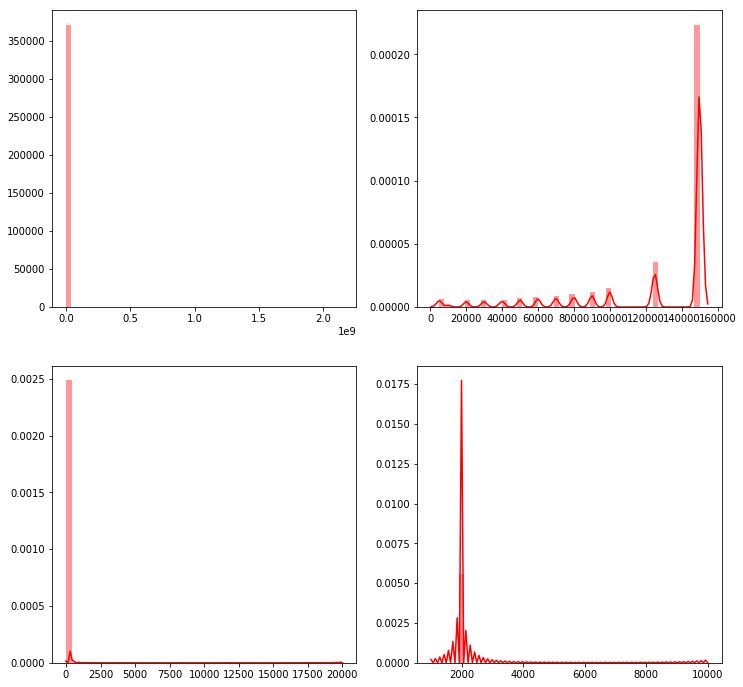

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.distplot(train['price'].values,bins=50, kde=False,color='r')
plt.subplot(2,2,2)
sns.distplot(train['kilometer'].values,bins=50,color='r')
plt.subplot(2,2,3)
sns.distplot(train['powerPS'].values,bins=50,color='r')
plt.subplot(2,2,4)
sns.distplot(train['yearOfRegistration'].values,bins=50,color='r')
plt.show()

# Feature Transformation/Engineering

In [12]:
train['lastSeen']= pd.to_datetime(train['lastSeen'])
train['dateCreated']= pd.to_datetime(train['dateCreated'])
train['inMarket']= train['lastSeen']- train['dateCreated']
train['carAge']= 2018- train['yearOfRegistration']

In [13]:
train['inMarket']= (train['inMarket']/np.timedelta64(1,'D')).astype(int)

# Outliers

The distribution of above features doesn't looks satisfying. It seems these features have outliers. We will remove the outliers and then will check back the distribution again.
Note- Removing outliers is not always a good approach, we need to consider many factors before removing them as we may loose important information. 

In [14]:
print('veryOldCars:{}'.format(len(train[train.yearOfRegistration<1960])))
print('ToonewCars:{}'.format(len(train[train.yearOfRegistration>2018])))
print('veryLowPS:{}'.format(len(train[train.powerPS==0])))
print('veryHighPS:{}'.format(len(train[train.powerPS>1000])))
print('lessKM:{}'.format(len(train[train.kilometer< 200])))
print('moreKM:{}'.format(len(train[train.kilometer>150000])))
print('expensiveCars:{}'.format(len(train[train.price>150000])))
print('cheapCars:{}'.format(len(train[train.price<=0])))

veryOldCars:540
ToonewCars:141
veryLowPS:40820
veryHighPS:306
lessKM:0
moreKM:0
expensiveCars:232
cheapCars:10778


In [15]:
train= train[(train.yearOfRegistration<2019)&(train.yearOfRegistration>=1960)& 
             (train.powerPS>=5)& (train.powerPS<=1000)&
             (train.price<=150000)& (train.price>=200)]

Distribution of features after removing outliers

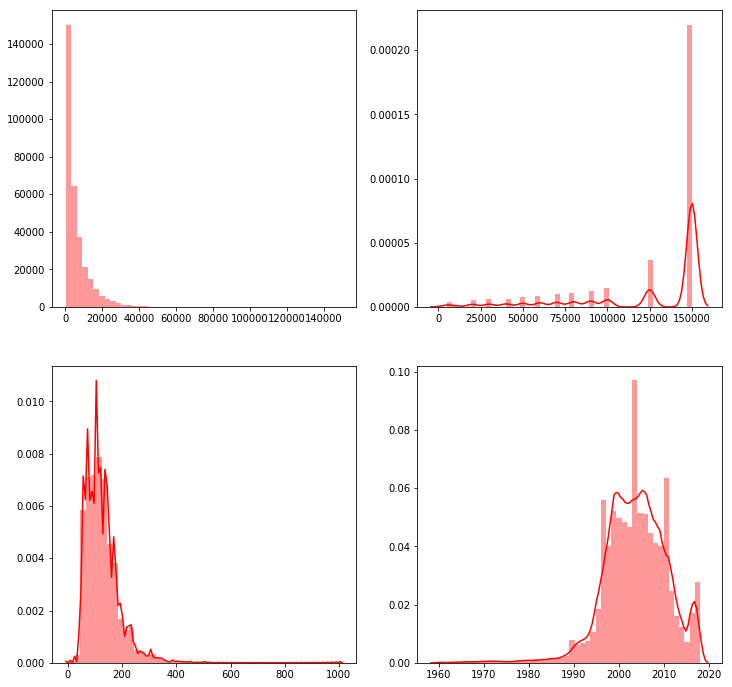

In [16]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.distplot(train.price.values,bins=50, kde=False,color='r')
plt.subplot(2,2,2)
sns.distplot(train.kilometer.values,bins=50,color='r')
plt.subplot(2,2,3)
sns.distplot(train.powerPS.values,bins=50,color='r')
plt.subplot(2,2,4)
sns.distplot(train.yearOfRegistration.values,bins=50,color='r')
plt.show()

In [17]:
train= train.drop(['lastSeen','dateCreated','dateCrawled','yearOfRegistration'], axis=1)

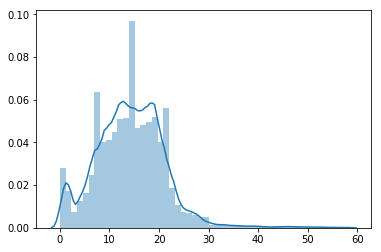

In [18]:
sns.distplot(train['carAge'].values,bins=50)

# Target(price)
The target variable(price) is skewed, we need to do the power transformation of price. Lets take logarithm of price column and compare the distribution of log(price) with price.

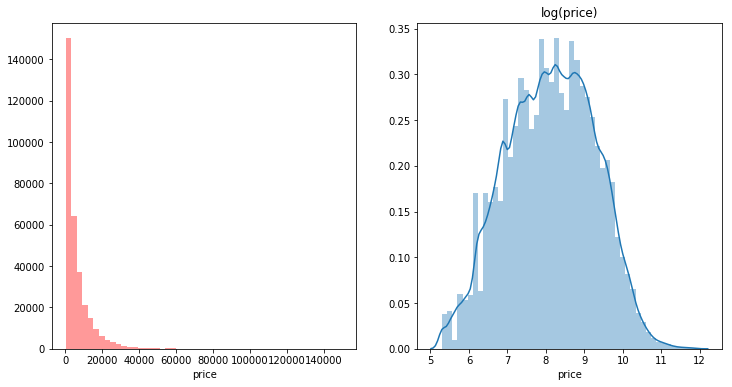

In [19]:
target=np.log1p(train['price'])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(train['price'],bins=50, kde=False,color='r')
plt.subplot(1,2,2)
plt.title('log(price)')
sns.distplot(target)
plt.show()

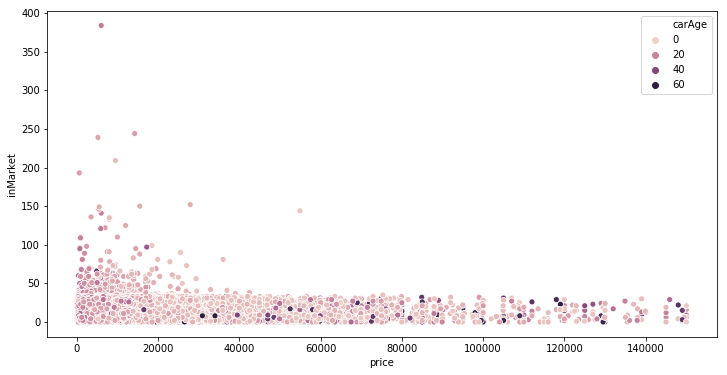

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='inMarket',hue= 'carAge', data=train)

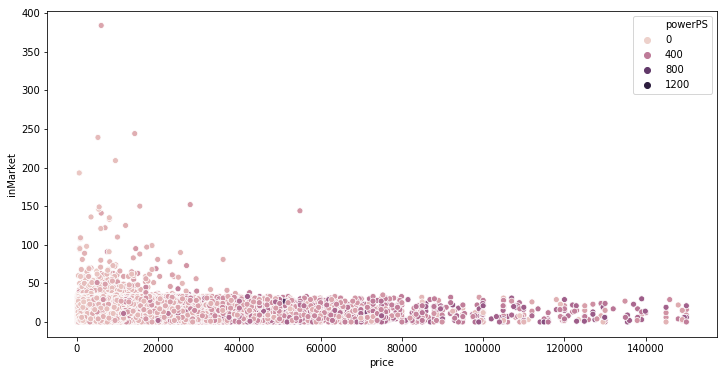

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='inMarket',hue= 'powerPS', data=train)

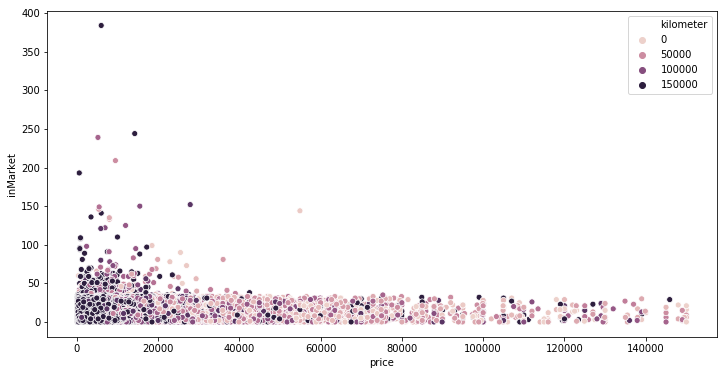

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='inMarket',hue= 'kilometer', data=train)

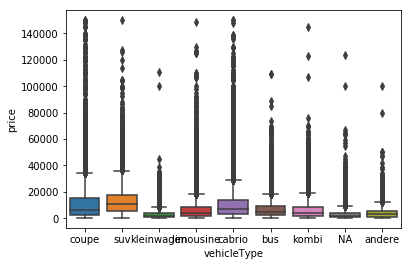

In [23]:
sns.boxplot(x="vehicleType", y="price", data=train)

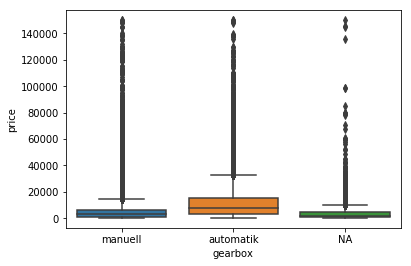

In [24]:
sns.boxplot(x="gearbox", y="price", data=train)

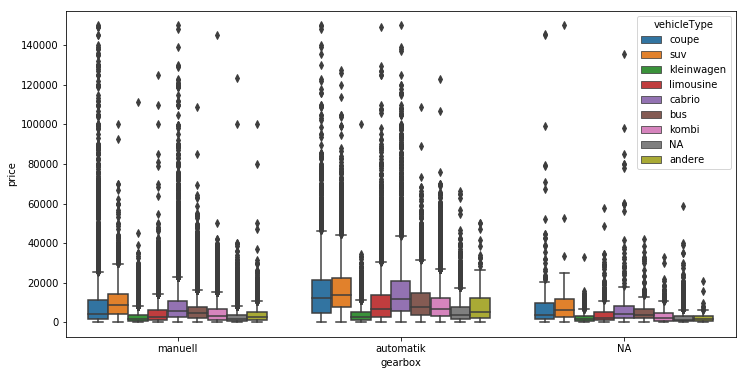

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x="gearbox", y="price",hue='vehicleType', data=train)

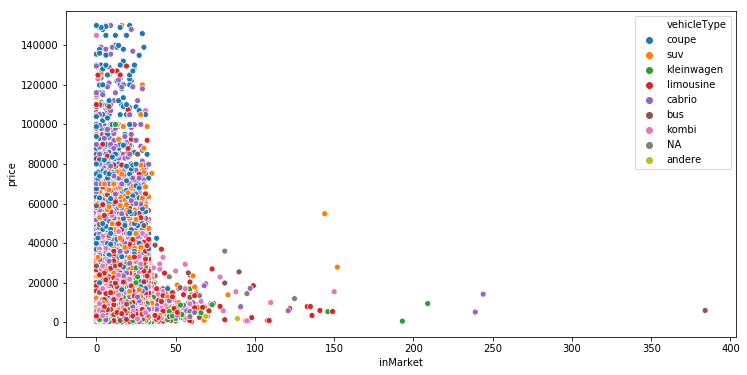

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="inMarket", y="price",hue= 'vehicleType',data=train)

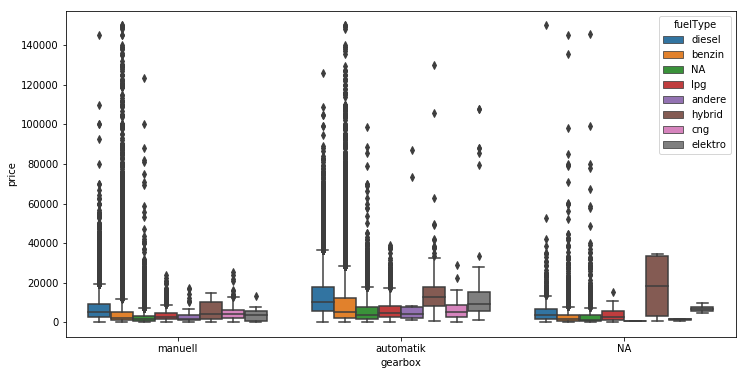

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x="gearbox", y="price",hue='fuelType', data=train)

In [28]:
train['brand'].value_counts()[:10]

volkswagen       68601
bmw              36161
opel             33286
mercedes_benz    31051
audi             29637
ford             21198
renault          14302
peugeot           9575
fiat              7806
seat              6168
Name: brand, dtype: int64

volkswagen and bmw are the most popular brands.  


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
numeric_feat= ['powerPS','kilometer','postalCode','inMarket']
train[numeric_feat]=scaler.fit_transform(train[numeric_feat])

In [30]:
train.describe()

,price,powerPS,kilometer,monthOfRegistration,postalCode,inMarket,carAge
count,319032.000000,319032.000000,319032.000000,319032.000000,319032.000000,319032.000000,319032.000000
mean,6229.433038,0.122220,0.831143,5.996652,0.509893,0.023483,14.299349
std,8090.867936,0.062688,0.270434,3.579720,0.260321,0.022476,7.033368
min,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1450.000000,0.075377,0.655172,3.000000,0.304252,0.005208,10.000000
50%,3500.000000,0.111558,1.000000,6.000000,0.502027,0.015625,14.000000
75%,7990.000000,0.145729,1.000000,9.000000,0.720543,0.036458,19.000000
max,150000.000000,1.000000,1.000000,12.000000,1.000000,1.000000,58.000000


Encoding categorical features

In [31]:
train=pd.get_dummies(train)

In [32]:
train.head()

,price,powerPS,kilometer,monthOfRegistration,postalCode,inMarket,carAge,abtest_control,abtest_test,vehicleType_NA,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_NA,notRepairedDamage_ja,notRepairedDamage_nein
1,18300,0.185930,0.827586,5,0.665989,0.036458,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,9800,0.158794,0.827586,8,0.903792,0.057292,14,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1500,0.070352,1.000000,6,0.909796,0.000000,17,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,3600,0.064322,0.586207,7,0.600115,0.015625,10,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,650,0.097487,1.000000,10,0.330614,0.005208,23,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
encoded = list(train.columns)
print ("{} total features after one-hot encoding".format(len(encoded)))

323 total features after one-hot encoding


Lets see the correlation of various features with price(target). We will look into the first 35 highly correlated features.

In [34]:
train.corr()['price'].abs().sort_values(ascending= False).head(35)

price                     1.000000
powerPS                   0.579116
kilometer                 0.441334
carAge                    0.348957
brand_porsche             0.311727
model_911                 0.308431
gearbox_automatik         0.307520
gearbox_manuell           0.286082
fuelType_diesel           0.222119
notRepairedDamage_nein    0.208924
vehicleType_kleinwagen    0.207434
vehicleType_suv           0.191738
fuelType_benzin           0.163099
notRepairedDamage_ja      0.146140
vehicleType_coupe         0.143486
vehicleType_cabrio        0.140561
notRepairedDamage_NA      0.133031
inMarket                  0.128026
brand_opel                0.127553
model_x_reihe             0.123579
brand_audi                0.123296
brand_bmw                 0.107174
model_a5                  0.105161
brand_mercedes_benz       0.101313
model_m_reihe             0.099967
brand_sonstige_autos      0.098329
model_q5                  0.096835
brand_renault             0.095191
vehicleType_NA      

# Model Development

Shuffle Split/Cross validation

Model Selection

Choose Performance metrics

train-test-split

In [35]:
y= train['price']
X= train.drop(['price'], axis=1)
y= np.log1p(y)

In [36]:
X.shape,y.shape

((319032, 322), (319032,))

We will use regularized linear regression models and some tree based models.

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

**Ridge (L2 regularizarion)


The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexible our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.


In [38]:
ridge = Ridge()

In [39]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

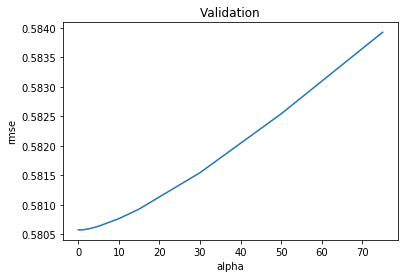

In [40]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

Note the curve above. When alpha is too large the regularization is too strong and the model cannot capture all the complexities in the data. If however we let the model be too flexible (alpha small) the model begins to overfit. A value of alpha = 3 is about right based on the plot above.

In [41]:
cv_ridge.min()

0.580575112753274

In [42]:
cv_ridge.mean()

0.581203909554777

**Lasso (L1 regularizarion)

For some reason the alphas in Lasso CV are really the inverse or the alphas in Ridge.
Another neat thing about the Lasso is that it does feature selection - setting coefficients of features it seems unimportant to zero. 

In [43]:
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, y)

In [44]:
rmse_cv(lasso).mean()

0.5947342996737415

In [45]:
coef = pd.Series(lasso.coef_, index = X.columns)

In [46]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 108 variables and eliminated the other 214 variables


In [47]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5,1,'Coefficients in the Lasso Model')

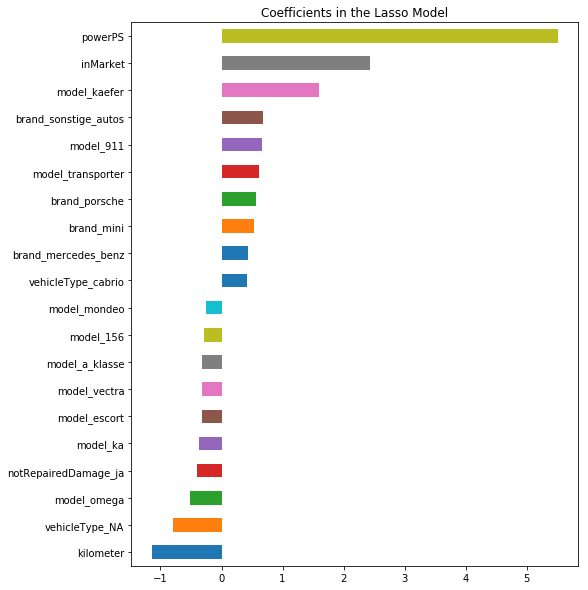

In [48]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

** Random Forest Regressor and Gradient Boosting

In [49]:
rfr = RandomForestRegressor() 
rmse_cv(rfr).mean()

0.41684988302804904

In [50]:
gbr = GradientBoostingRegressor() 
rmse_cv(gbr).mean()

0.46528824074317027

Performance of Random forest looks better than Gradient boosting, which is better than Ridge. Lets see and compare the importance of features in Random Forest and Gradient Boosting.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
rfr.fit(X_train,y_train)
pred_rfr= np.expm1(rfr.predict(X_test))

In [53]:
gbr.fit(X_train,y_train)
pred_gbr=  np.expm1(gbr.predict(X_test))

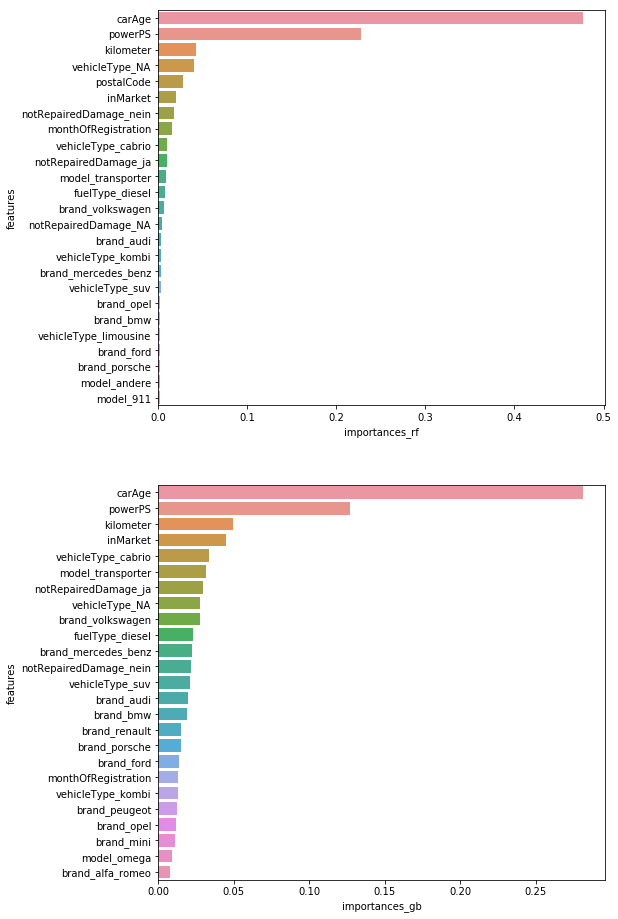

In [54]:
importance_rf=pd.DataFrame({'features': X_train.columns, 'importances_rf':rfr.feature_importances_})
importance_gb=pd.DataFrame({'features': X_train.columns, 'importances_gb':gbr.feature_importances_})
importance_rf= importance_rf.sort_values(by='importances_rf', ascending= False).head(25)
importance_gb= importance_gb.sort_values(by='importances_gb', ascending= False).head(25)
plt.figure(figsize=(8,16))
plt.subplot(211)
sns.barplot(x='importances_rf', y= 'features', data= importance_rf)
plt.subplot(212)
sns.barplot(x='importances_gb', y= 'features', data= importance_gb)
plt.show()                            

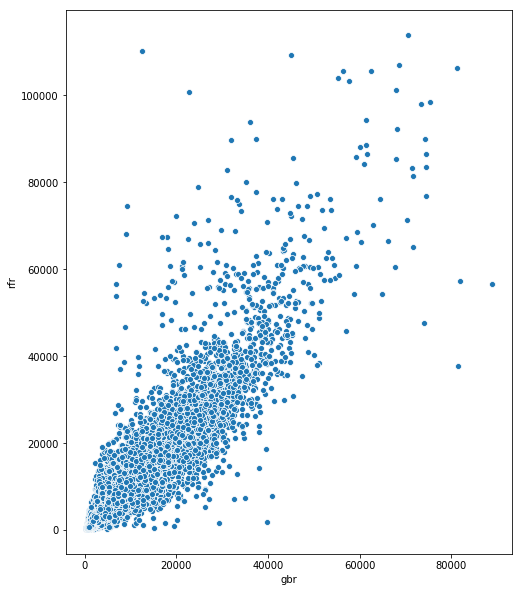

In [55]:
predictions = pd.DataFrame({"rfr":pred_rfr, "gbr":pred_gbr})
sns.scatterplot(x = "gbr", y = "rfr", data= predictions)

# Residual
Residual = Observed value – Predicted value

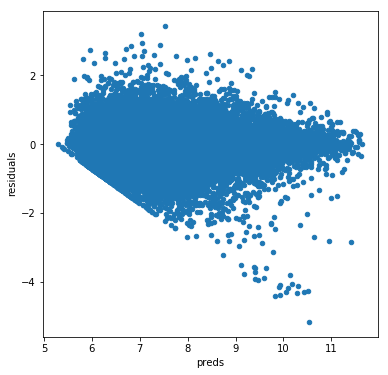

In [56]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":rfr.predict(X_test), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Many times it makes sense to take a weighted average of uncorrelated results - this usually improves the score.For example we can try pred_comb = 0.8*pred_rfr + 0.2*pred_gbr

# Observations:
1.Based on exploratory analysis, kilometer, age of the car and engine power are the most important factors affecting the sale price of the used cars.

2.SUV's are the most expensive and kleinwagen the cheapest cars in the used cars market.

3.The most popular brands are Volkswagen, BMW, Opel, Mercedes, Audi, Ford, Renault, Peugeot, Fiat and Seat.

4.Most of the cars are sold within 40 days.

5.Most of the used cars in market have more than 10000 kilometers.

6.Kleinwagen vehicle type is the cheapest and has the lowest engine power. 
